#[20MARKS]

# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow operations and basic numpy operations are allowed**


In [317]:
import tensorflow as tf
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np

# Q1) Display following stages
## a) Load 'skeleton_orig.tif'        


In [318]:
# Read image using TensorFlow
img_path = '/content/skeleton_orig.tif'
# img = tf.io.read_file(img_path)
img = imageio.imread(img_path)
img = tf.convert_to_tensor(img, dtype=tf.float32)
# img = tf.image.decode_image(img, channels=1)  # Grayscale image

In [319]:
# Define kernel
kernel_sz1 = tf.ones((1, 1), dtype=tf.float32)

In [320]:
# Change data type of image using TensorFlow
img_a = tf.cast(img, tf.float32)  # Convert image to float32
img_a = tf.nn.conv2d( tf.reshape(img_a, (1,img_a.shape[0],img_a.shape[1],1)),\
                     tf.reshape(kernel_sz1,\
                      (kernel_sz1.shape[0],kernel_sz1.shape[1],1,1)),\
                      strides=[1, 1, 1, 1], padding='SAME')

In [321]:
# Print information about the image
print('Original Data_type is', img.dtype)
print('Kernel_sz1 =', kernel_sz1)
print('Data_type is', img_a.dtype)
print('Image Size is', img_a.shape)
print('Image min and max are ({}, {})'.format(tf.reduce_min(img_a),\
                                              tf.reduce_max(img_a)))

Original Data_type is <dtype: 'float32'>
Kernel_sz1 = tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
Data_type is <dtype: 'float32'>
Image Size is (1, 800, 500, 1)
Image min and max are (0.0, 255.0)


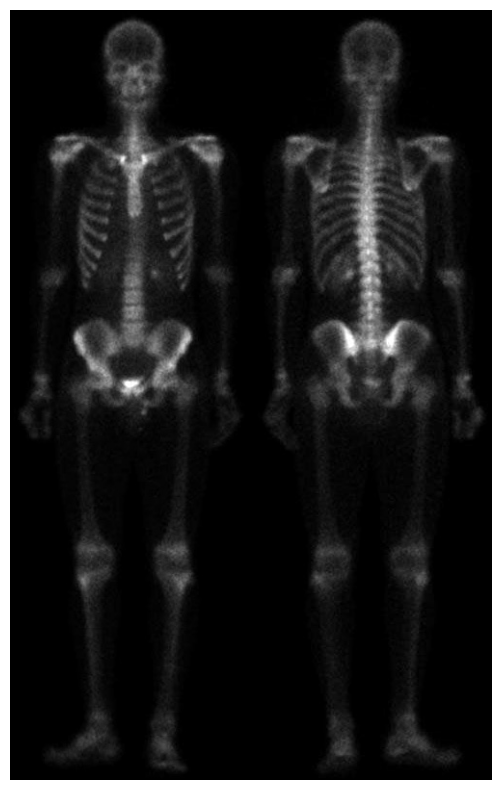

In [322]:
# average_filter = tf.convert_to_tensor(np.ones([7, 7]) / 49)
# average_filter = tf.reshape(average_filter, (average_filter.shape[0], average_filter.shape[1], 1, 1))
# average_filter = tf.cast(average_filter, tf.float32)

# img_a = tf.nn.conv2d(img_a, average_filter, strides=[1, 1, 1, 1], padding="SAME")

plt.figure(figsize=(10,10))
plt.imshow(tf.squeeze(img_a), cmap='gray')
plt.axis('off')
plt.show()

## b) Apply and display Laplacian of a) [2 Marks]


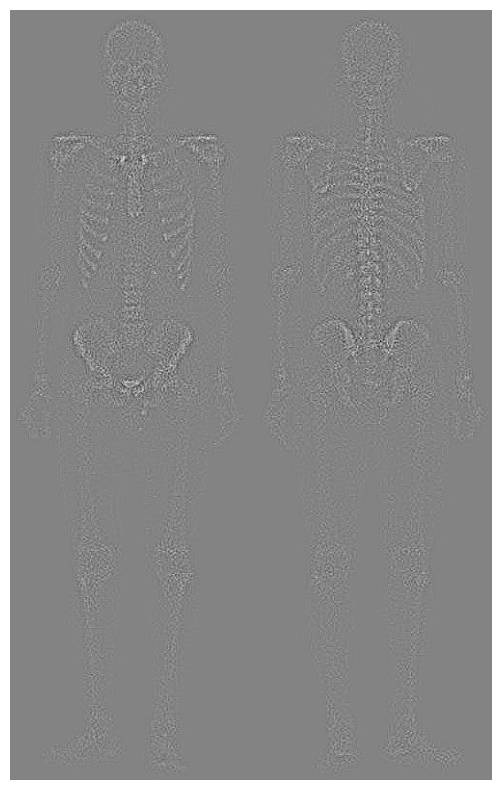

In [323]:
# laplace_kernel = tf.convert_to_tensor(np.array([-1, -1, -1, -1, 8, -1, -1, -1, -1]))
laplace_kernel = tf.convert_to_tensor(np.array([0, -1, 0, -1, 4, -1, 0, -1, 0]))
laplace_kernel = tf.reshape(laplace_kernel, (3, 3, 1, 1))
laplace_kernel = tf.cast(laplace_kernel, tf.float32)

laplacian = tf.nn.conv2d(img_a, laplace_kernel, strides=[1, 1, 1, 1], padding="SAME")

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(laplacian), cmap='gray')
plt.axis('off')
plt.show()

## c) Sharpen the image obtained by adding a) and b) [2 Marks]

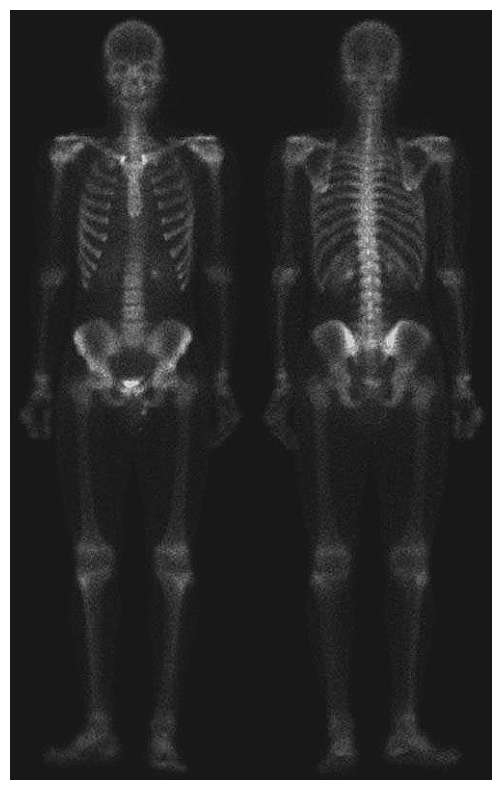

In [324]:
sharpened_out = tf.add(img_a, laplacian)

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sharpened_out), cmap='gray')
plt.axis('off')
plt.show()

## d) Sobel gradient of a) [4 Marks]

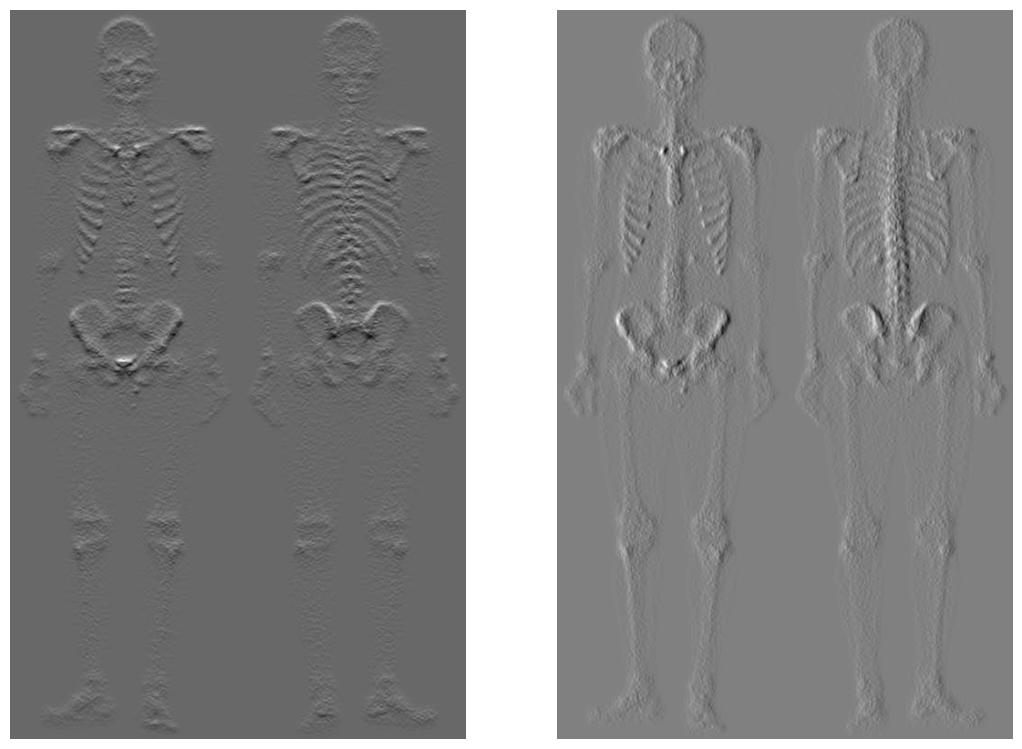

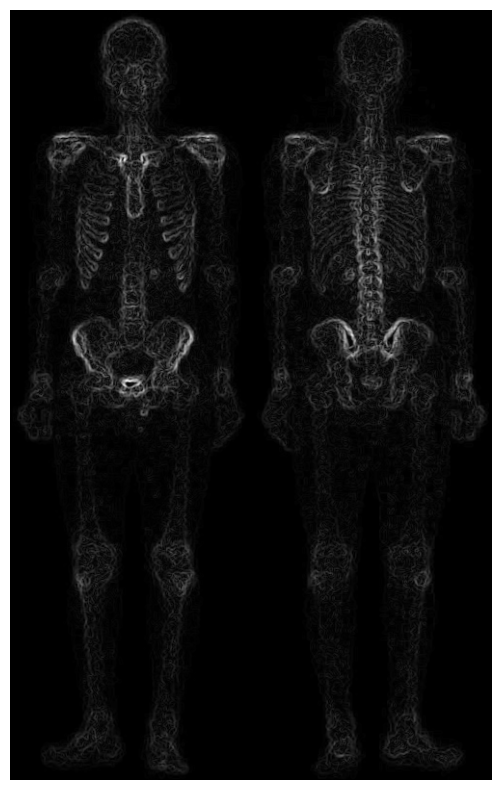

In [325]:
sobelx_kernel = tf.convert_to_tensor(np.array([-1, -2, -1, 0, 0, 0, 1, 2, 1]))
sobelx_kernel = tf.reshape(sobelx_kernel, (3, 3, 1, 1))
sobelx_kernel = tf.cast(sobelx_kernel, tf.float32)

sobely_kernel = tf.convert_to_tensor(np.array([-1, 0, 1, -2, 0, 2, -1, 0, 1]))
sobely_kernel = tf.reshape(sobely_kernel, (3, 3, 1, 1))
sobely_kernel = tf.cast(sobely_kernel, tf.float32)

sobelx_gradient = tf.nn.conv2d(img_a, sobelx_kernel, strides=[1, 1, 1, 1], padding="SAME")
sobely_gradient = tf.nn.conv2d(img_a, sobely_kernel, strides=[1, 1, 1, 1], padding="SAME")
sobel_gradient_magnitude = tf.sqrt(sobelx_gradient ** 2 + sobely_gradient ** 2)

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(tf.squeeze(sobelx_gradient), cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(tf.squeeze(sobely_gradient), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sobel_gradient_magnitude), cmap='gray')
plt.axis('off')
plt.show()

## e) Smooth the d) with a $5\times 5$ averaging filter [4 Marks]

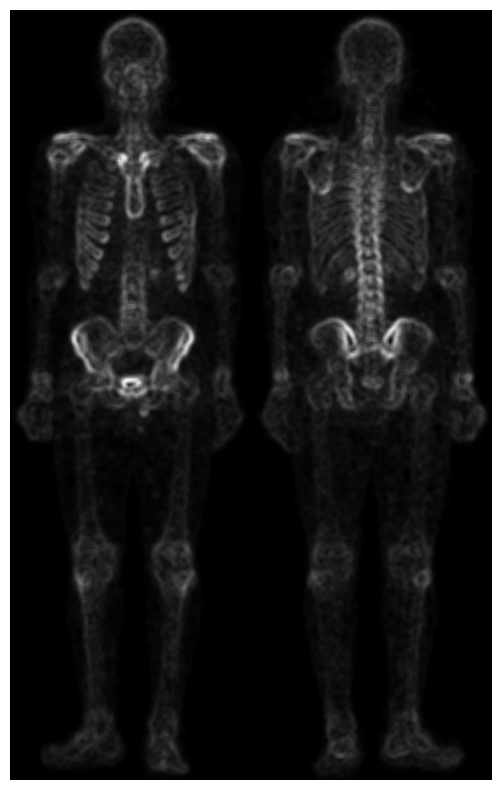

In [326]:
average_filter = tf.convert_to_tensor(np.ones([5, 5]), 25)
average_filter = tf.reshape(average_filter, (average_filter.shape[0], average_filter.shape[1], 1, 1))
average_filter = tf.cast(average_filter, tf.float32)

sobel_gradient_smooth = tf.nn.conv2d(sobel_gradient_magnitude, average_filter, strides=[1, 1, 1, 1], padding="SAME")

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sobel_gradient_smooth), cmap='gray')
plt.axis('off')
plt.show()

## f) Get Mask image formed by pixelwise product of c) and e) [2 Marks]

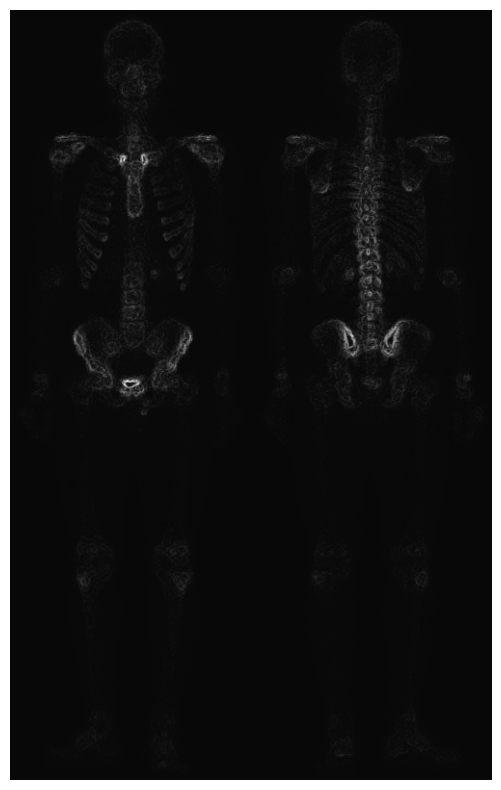

In [327]:
sobel_mask = tf.multiply(sharpened_out, sobel_gradient_magnitude)

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sobel_mask), cmap='gray')
plt.axis('off')
plt.show()

## g) Get sharpened image obtained by the sum of a) and f) [2 Marks]

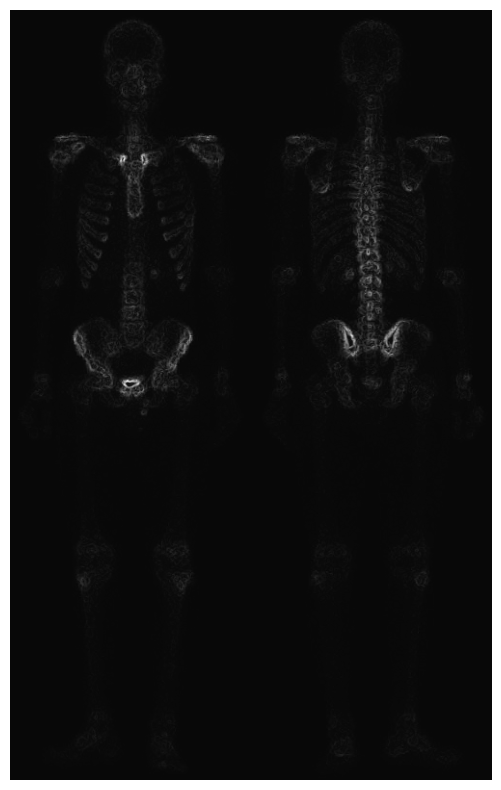

In [333]:
sobel_sharp_out = tf.add(img_a, sobel_mask)
sobel_sharp_out_blurred = tf.nn.conv2d(sobel_sharp_out, average_filter, strides=[1, 1, 1, 1], padding="SAME")

plt.figure(figsize=(10, 10))
plt.imshow(tf.squeeze(sobel_sharp_out), cmap='gray')
plt.axis('off')
plt.show()

## h) Final results obtained by applying power law transformation to g) [2 Marks]


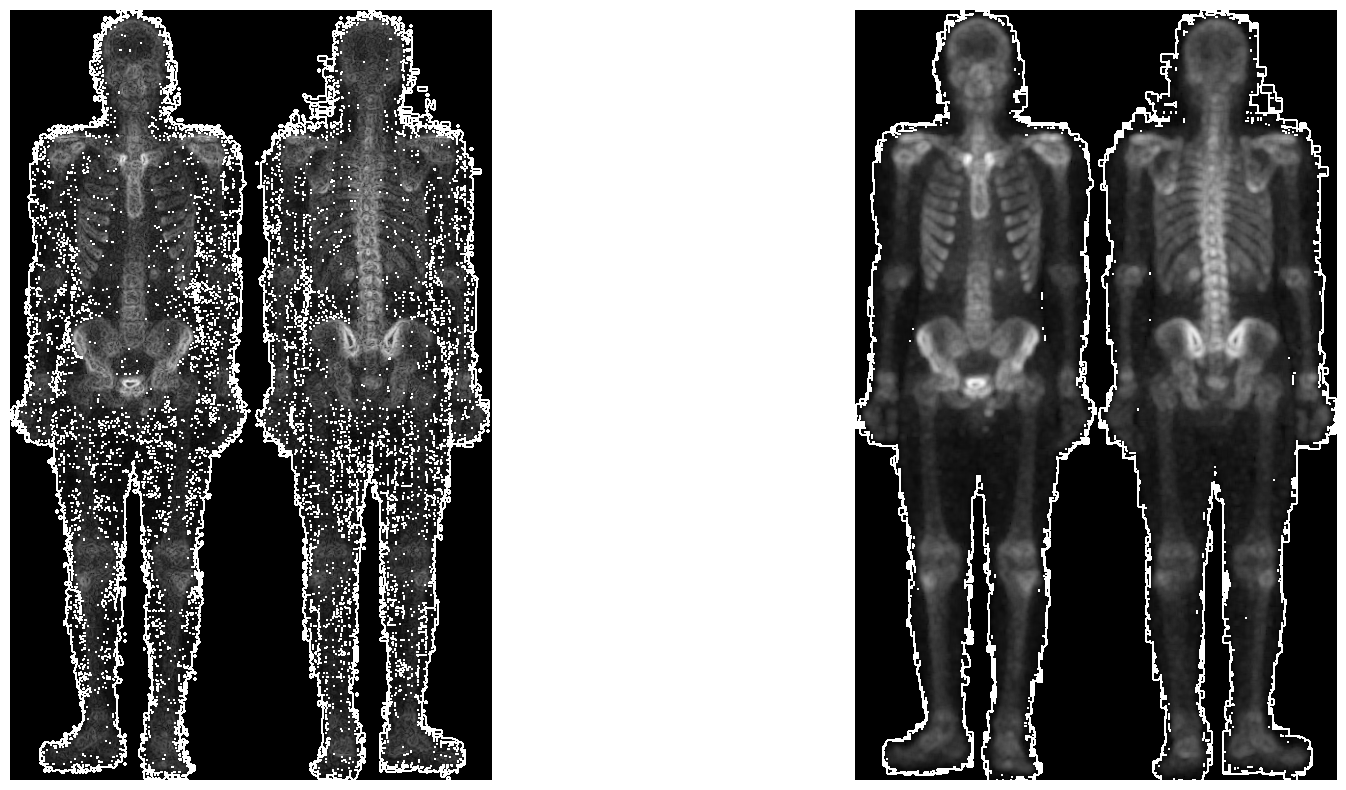

In [334]:
final_out = tf.image.adjust_gamma(sobel_sharp_out, 0.35)
final_out_blurred = tf.image.adjust_gamma(sobel_sharp_out_blurred, 0.35)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(tf.squeeze(final_out), cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(tf.squeeze(final_out_blurred), cmap='gray')
plt.axis('off')
plt.show()

##i) Write down your observation related to image enhancement from a) to h) [2 Marks]

Both Laplacian and Sobel Gradient operators sharpen the image.

The Laplacian of an image gives more fine details.

The Sobel Gradient of an image enhances the edges.

Using both can be better as it has enhanced edges while still maintaining fine details which the Laplacian alone would lose.

Adjusting the gamma by applying power law transformation puts a border around the edges of the subject of the image. This is quite inaccurate in a noisy picture but can be used for edge detection or subject detection when appropriately blurred beforehand.